# **PC-01 Exploratory Data Analysis**

# Setup
### Libraries

In [ ]:
# Extra repository for the Rgraphviz package
install.packages("BiocManager")
BiocManager::install("Rgraphviz")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.19), R 4.0.0 (2020-04-24)

Installing package(s) 'Rgraphviz'

also installing the dependencies ‘BiocGenerics’, ‘graph’


Warning message in install.packages(...):
“installation of package ‘BiocGenerics’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘graph’ had non-zero exit status”


In [ ]:
install.packages(
    c("psych",
      "ggridges"), dependencies = TRUE)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘foreign’, ‘pbivnorm’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘lme4’, ‘Rcsdp’, ‘ggplot2movies’, ‘vdiffr’


Warning message in install.packages(c("psych", "ggridges"), dependencies = TRUE):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages(c("psych", "ggridges"), dependencies = TRUE):
“installation of package ‘lme4’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
# Libraries
library(tidyverse)
library(zoo)
library(magrittr)
library(repr)
library(IRdisplay)
library(psych)
library(reshape2)
library(ggridges)
library(forcats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.5”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘zoo’ was built under R version 4.0.5

ERROR: Error in library(psych): there is no package called ‘psych’


### Load Data

In [6]:
tec.dataset.path <- '../../data/tec_dataset.csv'
tec.dataset <- read.csv(tec.dataset.path)
tec.dataset$y_quarter <- as.yearqtr(substring(tec.dataset$measureEndDate,1,10), format = "%Y-%m-%d")
tec.dataset %<>% 
    select(-c(measureStartDate, measureEndDate, sample, year)) %>% 
    distinct() %>%
    na.omit() %>% 
    rename(provider_id = providerId)

In [7]:
tec.dataset 

,provider_id,measureId,score,y_quarter
,<int>,<chr>,<int>,<yearqtr>
1,10001,AMI_10,98,2014 Q3
2,10001,AMI_2,99,2014 Q3
3,10001,AMI_8a,91,2014 Q3
4,10001,ED_1b,286,2014 Q3
5,10001,ED_2b,71,2014 Q3
6,10001,HF_1,91,2014 Q3
7,10001,HF_2,100,2014 Q3
8,10001,HF_3,98,2014 Q3
9,10001,IMM_2,94,2014 Q1


In [8]:
duplicate.scores <- tec.dataset %>%
    dplyr::group_by(provider_id, measureId,  y_quarter) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)

duplicate.scores

provider_id,measureId,y_quarter,n
<int>,<chr>,<yearqtr>,<int>
10001,OP_18b,2016 Q1,2
10001,OP_20,2016 Q1,2
10001,OP_21,2016 Q1,2
10001,PN_6,2015 Q3,2
10001,SCIP_CARD_2,2015 Q3,2
10001,SCIP_INF_1,2015 Q3,2
10001,SCIP_INF_2,2015 Q3,2
10001,SCIP_INF_3,2015 Q3,2
10001,SCIP_INF_9,2015 Q3,2


In [9]:
tec.dataset$combined <- tec.dataset %>% select(-score) %>%unite_("combined", c('provider_id','measureId','y_quarter')) %$% combined
duplicate.scores.combined <- duplicate.scores %>% unite_("combined", c('provider_id','measureId','y_quarter')) %$% combined
filtered.tec.dataset <- tec.dataset %>% filter(!(combined %in% duplicate.scores.combined)) %>% select(-combined)

Warning message:
“`unite_()` was deprecated in tidyr 1.2.0.
Please use `unite()` instead.”


In [10]:
filtered.tec.dataset

provider_id,measureId,score,y_quarter
<int>,<chr>,<int>,<yearqtr>
10001,AMI_10,98,2014 Q3
10001,AMI_2,99,2014 Q3
10001,AMI_8a,91,2014 Q3
10001,ED_1b,286,2014 Q3
10001,ED_2b,71,2014 Q3
10001,HF_1,91,2014 Q3
10001,HF_2,100,2014 Q3
10001,HF_3,98,2014 Q3
10001,IMM_2,94,2014 Q1


In [11]:
tec.dataset.wide <- filtered.tec.dataset %>% pivot_wider(names_from = measureId, values_from = score)
tec.dataset.wide

provider_id,y_quarter,AMI_10,AMI_2,AMI_8a,ED_1b,ED_2b,HF_1,HF_2,HF_3,⋯,SCIP_INF_4,SEP_1,OP_18c,OP_33,OP_31,IMM_3,SEP_SH_3HR,SEV_SEP_3HR,SEV_SEP_6HR,SEP_SH_6HR
<int>,<yearqtr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10001,2014 Q3,98,99,91,286,71,91,100,98,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10001,2014 Q1,NA,NA,88,277,63,NA,100,NA,⋯,84,NA,NA,NA,NA,NA,NA,NA,NA,NA
10001,2013 Q4,99,100,NA,NA,NA,96,NA,97,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10005,2014 Q3,100,100,NA,248,68,96,95,100,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10005,2014 Q1,NA,NA,NA,245,65,NA,90,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10005,2013 Q4,94,100,NA,NA,NA,97,NA,100,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10006,2014 Q3,100,100,100,202,93,100,100,100,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10006,2014 Q1,NA,NA,98,212,92,NA,100,NA,⋯,100,NA,NA,NA,NA,NA,NA,NA,NA,NA
10006,2013 Q4,99,100,NA,NA,NA,98,NA,100,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [12]:
measure.columns <- colnames(tec.dataset.wide)[-1:-2]
rowise.nas <- apply(is.na(tec.dataset.wide), 1, sum)
tec.dataset.wide$rowise.nas <- rowise.nas

In [13]:
sel <- function(x, data) {
    measure.only <- data %>% filter(!is.na(data[x])) %>% select(-c(provider_id,y_quarter,rowise.nas))
    summary <- measure.only %>% 
        is.na() %>%
        colSums() %>%
        t() %>%
        t() %>%
        as.data.frame() %>%
        rename(na.count = V1) %>%
        mutate(usable = 1 - (na.count / nrow(measure.only))) %>%
        #arrange(-usable) %>%
        #rownames_to_column("measureId") %>%
        select(-na.count) %>% 
        t()
    return(summary)
}
cross.measures.list <- measure.columns %>% lapply(sel, tec.dataset.wide)

In [14]:
cross.measure.matrix <- do.call(rbind.data.frame,cross.measures.list)
cross.measure.matrix$measure1 <- colnames(cross.measure.matrix)
rownames(cross.measure.matrix) <- NULL

In [15]:
sel2 <- function(x, data) {
    measure.only <- data %>% filter(!is.na(data[x])) %>% select(-c(provider_id,y_quarter,rowise.nas))
    summary <- measure.only %>% 
        is.na() %>%
        colSums() %>%
        t() %>%
        t() %>%
        as.data.frame() %>%
        rename(na.count = V1) %>%
        mutate(usable = 1 - (na.count / nrow(measure.only))) %>%
        arrange(-usable) %>%
        rownames_to_column("measureId") %>%
        select(-na.count)
    return(summary)
}
cross.measures.availabilities <- measure.columns %>% lapply(sel2, tec.dataset.wide)
names(cross.measures.availabilities) <- measure.columns

In [16]:
cross.measures.availabilities$SCIP_INF_4

measureId,usable
<chr>,<dbl>
SCIP_CARD_2,1.0000000
SCIP_INF_1,1.0000000
SCIP_INF_2,1.0000000
SCIP_INF_3,1.0000000
SCIP_INF_9,1.0000000
SCIP_INF_4,1.0000000
HF_2,0.9990282
IMM_2,0.9941691
SCIP_VTE_2,0.9941691


In [17]:
cross.measure.matrix %>% 
    pivot_longer(!measure1, 
                 names_to = "measure2", 
                 values_to = 'overlap') %>% filter(measure1 == "SEP_SH_3HR")

measure1,measure2,overlap
<chr>,<chr>,<dbl>
SEP_SH_3HR,AMI_10,0.0000000
SEP_SH_3HR,AMI_2,0.0000000
SEP_SH_3HR,AMI_8a,0.0000000
SEP_SH_3HR,ED_1b,0.0000000
SEP_SH_3HR,ED_2b,0.5018257
SEP_SH_3HR,HF_1,0.0000000
SEP_SH_3HR,HF_2,0.0000000
SEP_SH_3HR,HF_3,0.0000000
SEP_SH_3HR,IMM_2,0.0000000


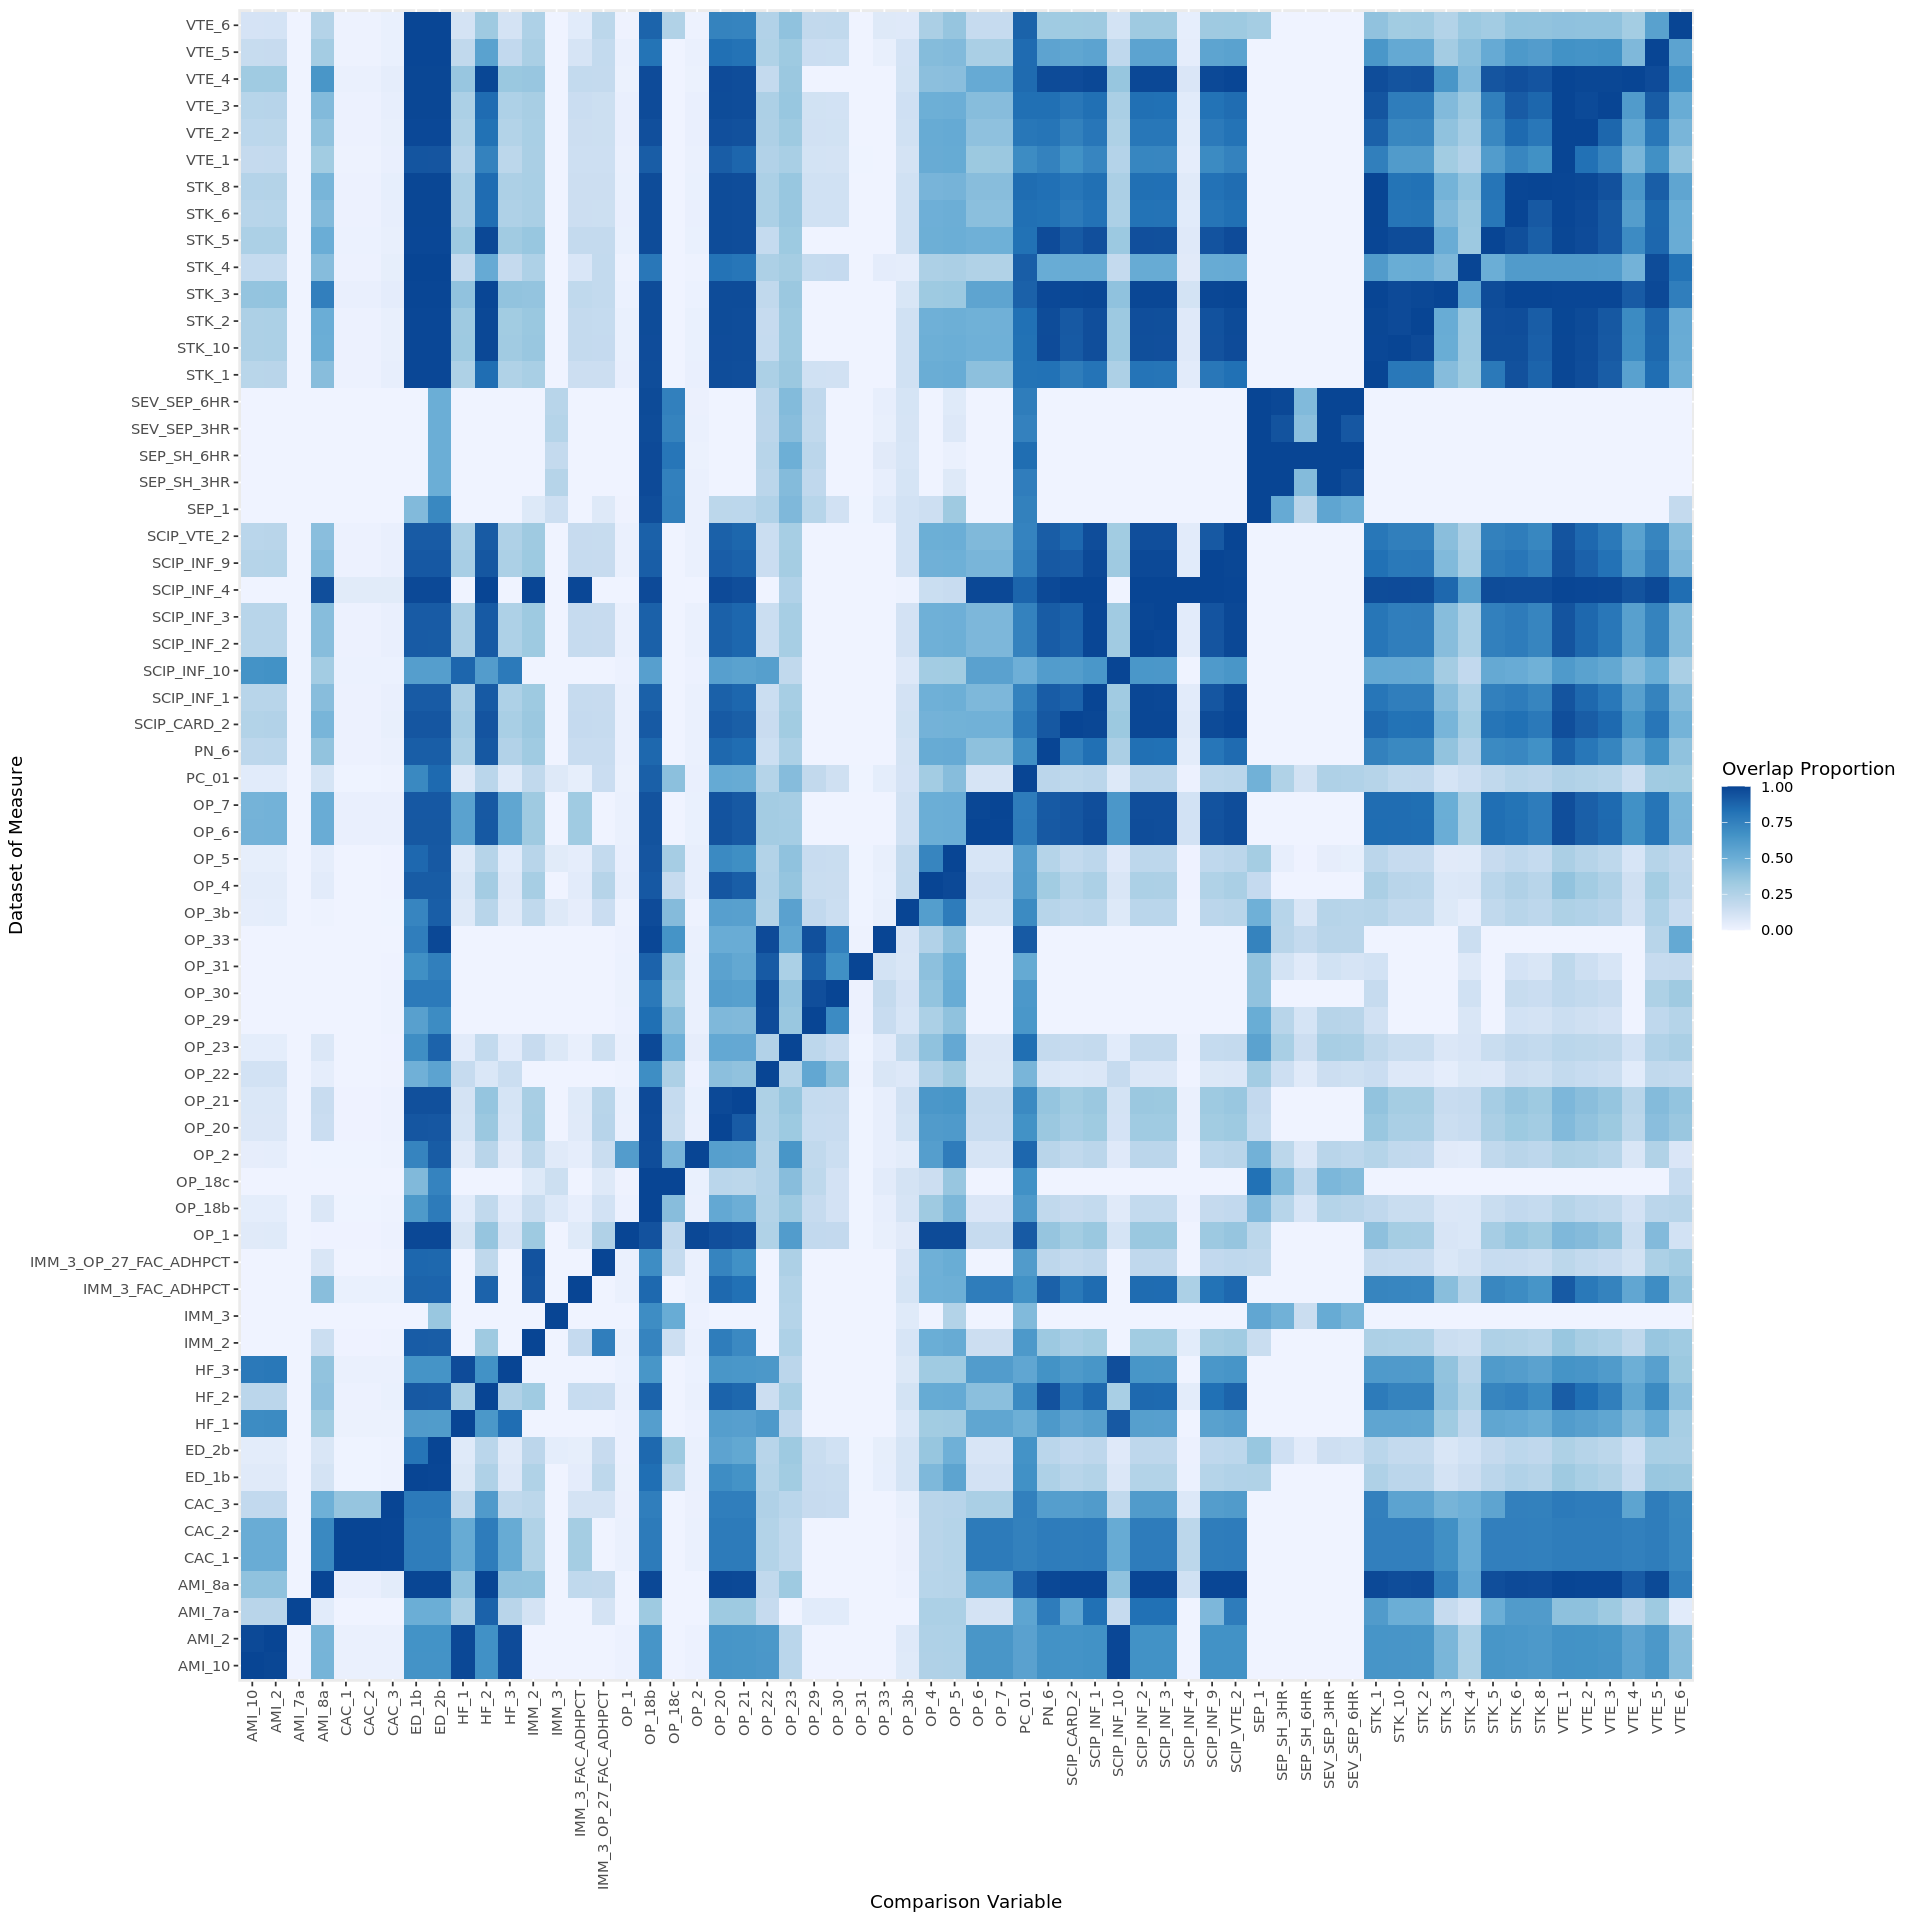

In [18]:
options(repr.plot.width=16, repr.plot.height=16)
cross.measure.matrix %>% 
    pivot_longer(!measure1, 
                 names_to = "measure2", 
                 values_to = 'overlap') %>%
    ggplot(aes(x = measure2, y = measure1, fill = overlap)) + 
        geom_tile(stat = 'identity') +
        labs(fill = "Overlap Proportion") +
        scale_fill_distiller(palette = 'Blues', direction = 1) +
        xlab("Comparison Variable") +
        ylab("Dataset of Measure") +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


In [19]:
cross.measures.availabilities %>% 
    lapply(function (x) sum(x$usable > .95)) %>% 
    unlist() %>% 
    t() %>% t() %>% 
    as.data.frame() %>% 
    arrange(-V1) %>% 
    head()

,V1
,<int>
SCIP_INF_4,29
AMI_8a,24
STK_3,24
VTE_4,21
STK_2,19
STK_10,18


In [20]:
tec.dataset %>% filter(measureId == "STK_10")

provider_id,measureId,score,y_quarter,combined
<int>,<chr>,<int>,<yearqtr>,<chr>
10001,STK_10,100,2014 Q3,10001_STK_10_2014 Q3
10005,STK_10,100,2014 Q3,10005_STK_10_2014 Q3
10006,STK_10,98,2014 Q3,10006_STK_10_2014 Q3
10007,STK_10,93,2014 Q3,10007_STK_10_2014 Q3
10011,STK_10,96,2014 Q3,10011_STK_10_2014 Q3
10012,STK_10,92,2014 Q3,10012_STK_10_2014 Q3
10016,STK_10,98,2014 Q3,10016_STK_10_2014 Q3
10019,STK_10,100,2014 Q3,10019_STK_10_2014 Q3
10023,STK_10,97,2014 Q3,10023_STK_10_2014 Q3


In [ ]:
measure.columns %>% lapply(function (x) tec.dataset.wide %>% select(-all_of(x)))

In [ ]:
tec.dataset.wide %>% filter(!is.na(PC_01)) %>% describe()

In [ ]:
pc.01.wide <- tec.dataset.wide %>% filter(is.na(tec.dataset.wide$PC_01) == FALSE)
pc.01.wide

In [ ]:
setNames(nm=c('colname','na.count'),stack(colSums(is.na(pc.01.wide)))[2:1]) %>% arrange(na.count)

In [ ]:
pc.01.wide.selection <- pc.01.wide %>% select(provider_id, y_quarter, PC_01, OP_18b, ED_2b)

In [ ]:
pc.01.wide.selection %>% ggplot(aes(x = PC_01, y = OP_18b)) + geom_point()

In [ ]:
pc.01.wide.selection %>% ggplot(aes(x = PC_01, y = ED_2b)) + geom_point()

In [ ]:
# Load data
#measure.dataset.csv.path <- '../tmp/sep_01_dataset.csv'
#measure.data <- read.csv(measure.dataset.csv.path)
measure.data <- tec.dataset %>% filter(measureId == "PC_01") %>% select(-combined, -measureId)
measure.data

In [ ]:
#measure.data %>% write.csv('../../data/pc01_dataset.csv', row.names = FALSE)

In [ ]:
getwd()

In [ ]:
measure.data <- read.csv('../../data/PC-01.csv')
measure.data

# Summary Statistics

The PC-01 dataset contains 42370 observations and ranges from 2017Q3 to 2021Q3 with relatively consistent reporting quantities. The median PC-01 score is 57. The lower 10th percentile is 31, and the upper 90th percentile is 79. Half of all PC-01 data lies between the range of 43 and 69. Historically, there was a slight drift upwards in the median score until 2019, when the PC-01 scores stabilized. 

In [ ]:
measure.data %>% nrow()

In [ ]:
measure.data %$% score %>% describe(., quant = c(0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99))

In [ ]:
measure.data$y_quarter <- as.yearqtr(paste0(measure.data$year,'Q',measure.data$quarter))

In [ ]:
table(measure.data$y_quarter)

In [ ]:
# Change plot size to 12 x 8
options(repr.plot.width=12, repr.plot.height=8)

measure.data %>%
    ggplot(aes(x = y_quarter)) +
    geom_bar() +
    xlab("Quarter") +
    ylab("Observation Count") +
    ggtitle("PC-01 Observation Counts by Quarter")

In [ ]:
measure.data %>%
    ggplot(aes(x = y_quarter, y = score, group = y_quarter)) +
    ylab("PC-01 Score") +
    xlab("Quarter") +
    geom_boxplot(fill = "#00BFC4")+
    ggtitle("PC-01 Score Distribution by Quarter")

### Provider Analysis

The PC-01 dataset contains 3320 unique providers. Most providers have 14 quarters of data. 3027 providers had 8 or more quarters of data and were thus included in the ACF Time Series Analysis.

In [ ]:
measure.data %$% provider_id %>% n_distinct()

In [ ]:
provider.counts <- 
    measure.data %>%
    arrange(provider_id, y_quarter) %>%
    group_by(provider_id) %>%
    count() %>%
    rename(provider.n = n) %>% 
    arrange(-provider.n) 

provider.counts %>% head()

In [ ]:
measure.data %>%
    arrange(provider_id,y_quarter) %>%
    count(provider_id) %T>% 
        {describe(., quant = c(.1,.25,.75,.9)) %>% display()} %>%
    ggplot(aes(n)) +
    xlab("Sequential Quarters of Data Avaiable") + 
    ylab("Provider Count") + 
    geom_histogram(bins =30) +
    ggtitle("Provider Time Sequence Length")

In [ ]:
measure.data.filtered <- measure.data %>%
    arrange(provider_id,y_quarter) %>%
    group_by(provider_id) %>%
    filter(n() >= 8)

In [ ]:
measure.data.filtered %$% provider_id %>% n_distinct()

# Time Series Analysis

### Provider Level ACF Plots
From the handful of plot below, we see some evidence of autocorrelation among lags one and two. A ridge plot willl be applied to test this trend more broadly across all providers.

In [ ]:
#ACF quick visual
measure.data.filtered %>%
    filter(provider_id <= 10021) %>%
    select(provider_id, score) %>%
    group_by(provider_id) %>%
    group_map(acf, na.action= na.exclude)

### ACF Value Matrix

In [ ]:
ac_scores <- 
    measure.data.filtered %>%
    select(provider_id, score) %>%
    group_by(provider_id)%>%
    group_map(acf, plot = FALSE, na.action= na.exclude)

unlisted <- ac_scores %>% unlist(recursive = FALSE)

acfs <- unlisted[names(unlisted) == "acf"]

acf.matrix <- acfs %>% 
    lapply(head, 8) %>% 
    do.call(rbind, .)

In [ ]:
colnames(acf.matrix) <- paste("Lag", 0:7)

In [ ]:
acf.matrix %>% head()

### Ridgeline Plot 

Looking at all providers confirms this trend on a broader scale- there is a significant correlation between many providers' current score and their past two previous scores (lag 1 and lag 2). Lag 1 and Lag 2 should therefore be included in the model features. 

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)
acf.matrix %>% 
    as.data.frame() %>% 
    gather(Lag, Correlation) %>%
    mutate(Lag = as.factor(Lag)) %>%
    mutate(Lag = fct_relevel(Lag, paste("Lag",0:7))) %>%
    ggplot(aes(x = Correlation, y = Lag, fill = ..x..)) + 
        geom_vline(
            xintercept=0, 
            color = "darkslategrey", 
            linetype = 'dashed', 
            size = 1) +
        geom_density_ridges_gradient(scale = 3, alpha = 0.2) +
        scale_fill_gradient2(
            low = "#cf597e",
            mid = "#e9e29c",
            high = "#009392",
            space = "Lab",
            na.value = "grey50",
            guide = "colourbar",
            aesthetics = "fill") + 
        theme_ridges() + 
        ggtitle("Distribution of provider level lag correlations - PC-01") +
        theme(legend.position = "none")
